In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [34]:
summer = pd.read_csv("Resources/summer.csv")
years = summer['Year'].unique()
countrycodes = pd.read_csv("resources/ioc_codes.csv")
hostcities = pd.read_csv("Resources/olympic_hosts.csv")
hosts_summer = hostcities.loc[hostcities["Type"] == "summergames"]
host_names = hosts_summer['Country'].unique()

In [4]:
years

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012], dtype=int64)

In [35]:
host_names

array(['Greece', 'France', 'United States of America', 'Great Britain',
       'Sweden', 'Belgium', 'Netherlands', 'Germany', 'Finland',
       'Australia, Sweden', 'Italy', 'Japan', 'Mexico', 'W Germany',
       'Canada', 'USSR', 'Republic of Korea', 'Spain', 'Australia',
       "People's Republic of China", 'Brazil'], dtype=object)

,Type,GamesUrl,Disciplines,DisciplinesList,Country,Date,Athletes,Countries,Events,City,Year
0,summergames,https://www.olympic.org/athens-1896,10,"['Athletics', 'Cycling Road', 'Cycling Track',...",Greece,06 Apr - 15 Apr,241.0,14.0,43.0,Athens,1896
1,summergames,https://www.olympic.org/paris-1900,20,"['Archery', 'Athletics', 'Basque Pelota', 'Cri...",France,14 May - 28 Oct,997.0,24.0,95.0,Paris,1900
2,summergames,https://www.olympic.org/st-louis-1904,19,"['Archery', 'Athletics', 'Basketball', 'Boxing...",United States of America,01 Jul - 23 Nov,651.0,12.0,95.0,St Louis,1904
3,summergames,https://www.olympic.org/london-1908,25,"['Archery', 'Athletics', 'Boxing', 'Cycling Tr...",Great Britain,27 Apr - 31 Oct,2008.0,22.0,110.0,London,1908
4,summergames,https://www.olympic.org/stockholm-1912,18,"['Athletics', 'Cycling Road', 'Diving', 'Eques...",Sweden,05 May - 27 Jul,2407.0,28.0,102.0,Stockholm,1912
5,summergames,https://www.olympic.org/antwerp-1920,29,"['Archery', 'Athletics', 'Boxing', 'Cycling Ro...",Belgium,20 Apr - 12 Sep,2622.0,29.0,156.0,Antwerp,1920
7,summergames,https://www.olympic.org/paris-1924,23,"['Athletics', 'Boxing', 'Cycling Road', 'Cycli...",France,04 May - 27 Jul,3088.0,44.0,126.0,Paris,1924
9,summergames,https://www.olympic.org/amsterdam-1928,20,"['Athletics', 'Boxing', 'Cycling Road', 'Cycli...",Netherlands,17 May - 12 Aug,2883.0,46.0,109.0,Amsterdam,1928
10,summergames,https://www.olympic.org/los-angeles-1932,20,"['Athletics', 'Boxing', 'Cycling Road', 'Cycli...",United States of America,30 Jul - 14 Aug,1334.0,37.0,117.0,Los Angeles,1932
13,summergames,https://www.olympic.org/berlin-1936,25,"['Athletics', 'Basketball', 'Boxing', 'Canoe S...",Germany,01 Aug - 16 Aug,3963.0,49.0,129.0,Berlin,1936


# Question 1


# Question 2

# Question 3

In [36]:
hosts = []
hosts_years = []
hosts_countries = []
hosts_sample = []
minpos = 0
maxpos = len(years)

for pos in range (minpos, maxpos):
    year = years[pos]
    host = hosts_summer["Country"].loc[hosts_summer["Year"] == year].values[0]
    if year == 1956:
        host = "Australia"
    try:
        code = countrycodes["IOC"].loc[countrycodes["Country"] == host].values[0]
    except IndexError:
        code = ""
    prev1 = pos-1
    prev2 = pos-2
    prev3 = pos-3
    next1 = pos+1
    next2 = pos+2
    next3 = pos+3
    if prev1 >= minpos:
        prev1year = years[prev1]
    else:
        prev1year = 0
    if prev2 >= minpos:
        prev2year = years[prev2]
    else:
        prev2year = 0
    if prev3 >= minpos:
        prev3year = years[prev3]
    else:
        prev3year = 0
    if next1 < maxpos:
        next1year = years[next1]
    else:
        next1year = 0
    if next2 < maxpos:
        next2year = years[next2]
    else:
        next2year = 0
    if next3 < maxpos:
        next3year = years[next3]
    else:
        next3year = 0
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(prev3year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(prev2year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(prev1year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(next1year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(next2year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(next3year)

hosts = pd.DataFrame({"Host Year": hosts_years, "Country": hosts_countries, "Year": hosts_sample})
hosts

,Host Year,Country,Year
0,1896,GRE,0
1,1896,GRE,0
2,1896,GRE,0
3,1896,GRE,1896
4,1896,GRE,1900
...,...,...,...
184,2012,GBR,2008
185,2012,GBR,2012
186,2012,GBR,0
187,2012,GBR,0


In [7]:
summary_summer = summer.groupby(["Year", "Country"])["Medal"].size().reset_index()

host_medals = pd.merge(hosts, summary_summer, on=["Year", "Country"], how="left")
host_medals = host_medals.dropna()
host_medals

,Host Year,Country,Year,Medal
3,1896,GRE,1896,52.0
5,1896,GRE,1904,2.0
6,1896,GRE,1908,3.0
9,1900,FRA,1896,11.0
10,1900,FRA,1900,185.0
...,...,...,...,...
179,2008,CHN,2012,128.0
182,2012,GBR,2000,55.0
183,2012,GBR,2004,57.0
184,2012,GBR,2008,77.0


## Plots

<function matplotlib.pyplot.show(close=None, block=None)>

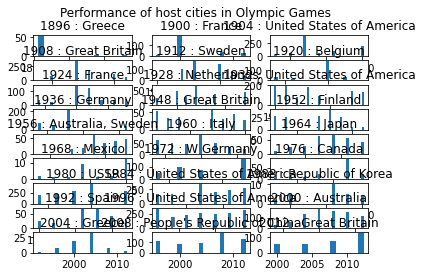

<Figure size 1296x864 with 0 Axes>

In [46]:
fig, ax = plt.subplots(9,3)
fig.suptitle("Performance of host cities in Olympic Games")
plt.figure(figsize=(18,12)) 

for plot in range (len(years)):
    row = int(plot/3)
    col = plot % 3
    year = years[plot]
    plotdf = host_medals.loc[host_medals["Host Year"] == years[plot]]
    name = hosts_summer["Country"].loc[hosts_summer["Year"] == year].to_list()[0]
    plotyears = plotdf["Year"].to_list()
    plotdata = plotdf["Medal"].to_list()
    ax[row, col].bar(plotyears, plotdata)
    plot_title = f"{year} : {name}"
    ax[row, col].set_title(plot_title)
    
plt.show

## Statistical analysis

In [8]:
host_medals.loc[(host_medals["Country"]=="GRE")].reset_index().tail(30)

,index,Host Year,Country,Year,Medal
0,3,1896,GRE,1896,52.0
1,5,1896,GRE,1904,2.0
2,6,1896,GRE,1908,3.0
3,168,2004,GRE,1992,2.0
4,169,2004,GRE,1996,8.0
5,170,2004,GRE,2000,18.0
6,171,2004,GRE,2004,31.0
7,172,2004,GRE,2008,7.0
8,173,2004,GRE,2012,3.0


In [9]:
#Null Hypothis is being Host doesn't make a difference
Greece1896_df = pd.DataFrame({
    "observed": [52, 0, 2, 3],
    "expected": [14.25,14.25,14.25,14.25]
}, index=["1896", "1900", "1904", "1908"])
Greece1896_df

,observed,expected
1896,52,14.25
1900,0,14.25
1904,2,14.25
1908,3,14.25


In [10]:
stats.chisquare(Greece1896_df['observed'], Greece1896_df['expected'])

Power_divergenceResult(statistic=133.66666666666666, pvalue=8.766316245006251e-29)

In [11]:
France1900_df = pd.DataFrame({
    "observed": [11,185, 35, 25],
    "expected": [64,64,64,64]
}, index=["1896", "1900", "1908", "1912"])
France1900_df

,observed,expected
1896,11,64
1900,185,64
1908,35,64
1912,25,64


In [12]:
stats.chisquare(France1900_df['observed'], France1900_df['expected'])

Power_divergenceResult(statistic=309.5625, pvalue=8.473593998681377e-67)

In [13]:
USA1904_df = pd.DataFrame({
    "observed": [20,55,394, 63,101,193],
    "expected": [137,138,137,138,138,138]
}, index=["1896", "1900", "1904", "1908","1912","1920"])
USA1904_df

,observed,expected
1896,20,137
1900,55,138
1904,394,137
1908,63,138
1912,101,138
1920,193,138


In [14]:
stats.chisquare(USA1904_df['observed'], USA1904_df['expected'])

Power_divergenceResult(statistic=704.5509362107268, pvalue=5.096164247574544e-150)

In [15]:
GBR1908_df = pd.DataFrame({
    "observed": [7,78,2, 347,160,107,66],
    "expected": [109.57,109.57,109.57,109.57,109.57,109.57,109.57]
}, index=["1896", "1900", "1904", "1908","1912","1920","1924"])
GBR1908_df

,observed,expected
1896,7,109.57
1900,78,109.57
1904,2,109.57
1908,347,109.57
1912,160,109.57
1920,107,109.57
1924,66,109.57


In [16]:
stats.chisquare(GBR1908_df['observed'], GBR1908_df['expected'])

Power_divergenceResult(statistic=765.809202336406, pvalue=3.7502843952284635e-162)

In [17]:
SWE1912_df = pd.DataFrame({
    "observed": [1,98,173,146,80,36],
    "expected": [89,89,89,89,89,89]
}, index=["1900", "1908","1912","1920","1924","1928"])
SWE1912_df

,observed,expected
1900,1,89
1908,98,89
1912,173,89
1920,146,89
1924,80,89
1928,36,89


In [18]:
stats.chisquare(SWE1912_df['observed'], SWE1912_df['expected'])

Power_divergenceResult(statistic=236.17977528089887, pvalue=5.062919347721861e-49)

In [19]:
BEL1920_df = pd.DataFrame({
    "observed": [31,19,188,38,5],
    "expected": [56.2,56.2,56.2,56.2,56.2]
}, index=["1908","1912","1920","1924","1928"])
BEL1920_df

,observed,expected
1908,31,56.2
1912,19,56.2
1920,188,56.2
1924,38,56.2
1928,5,56.2


In [20]:
stats.chisquare(BEL1920_df['observed'], BEL1920_df['expected'])

Power_divergenceResult(statistic=397.55871886120997, pvalue=9.370692771854178e-85)

In [21]:
FRA1924_df = pd.DataFrame({
    "observed":[35,25,141,122,36,37,43],
    "expected": [62.7,62.7,62.7,62.7,62.7,62.7,62.7]
}, index=["1908","1912","1920","1924","1928","1932","1936"])
FRA1924_df

,observed,expected
1908,35,62.7
1912,25,62.7
1920,141,62.7
1924,122,62.7
1928,36,62.7
1932,37,62.7
1936,43,62.7


In [22]:
stats.chisquare(FRA1924_df['observed'], FRA1924_df['expected'])

Power_divergenceResult(statistic=216.86491228070176, pvalue=4.849323988826844e-44)

In [23]:
NED1928_df = pd.DataFrame({
    "observed": [22,48,26,65,12,37,42],
    "expected": [36,36,36,36,36,36,36]
}, index=["1912","1920","1924","1928","1932","1936","1948"])
NED1928_df

,observed,expected
1912,22,36
1920,48,36
1924,26,36
1928,65,36
1932,12,36
1936,37,36
1948,42,36


In [24]:
stats.chisquare(NED1928_df['observed'], NED1928_df['expected'])

Power_divergenceResult(statistic=52.61111111111111, pvalue=1.4050653009397846e-09)

In [25]:
USA1932_df = pd.DataFrame({
    "observed": [193,198,84,181,92,148,132],
    "expected": [146.85,146.85,146.85,146.85,146.85,146.85,146.85]
}, index=["1920","1924","1928","1932","1936","1948","1952"])
USA1932_df

,observed,expected
1920,193,146.85
1924,198,146.85
1928,84,146.85
1932,181,146.85
1936,92,146.85
1948,148,146.85
1952,132,146.85


In [26]:
stats.chisquare(USA1932_df['observed'], USA1932_df['expected'])

Power_divergenceResult(statistic=89.15803541028261, pvalue=4.5319752619692944e-17)

In [27]:
GER1936_df = pd.DataFrame({
    "observed": [72,38,210,40],
    "expected": [90,90,90,90]
}, index=["1928","1932","1936","1952"])
GER1936_df

,observed,expected
1928,72,90
1932,38,90
1936,210,90
1952,40,90


In [28]:
stats.chisquare(GER1936_df['observed'], GER1936_df['expected'])

Power_divergenceResult(statistic=221.42222222222222, pvalue=9.89177642784769e-48)

In [29]:
GBR1948_df = pd.DataFrame({
    "observed": [55,34,36,56,31,45,28],
    "expected": [40.7,40.7,40.7,40.7,40.7,40.7,40.7]
}, index=["1928","1932","1936","1948","1952","1956","1960"])
GBR1948_df

,observed,expected
1928,55,40.7
1932,34,40.7
1936,36,40.7
1948,56,40.7
1952,31,40.7
1956,45,40.7
1960,28,40.7


In [30]:
stats.chisquare(GBR1948_df['observed'], GBR1948_df['expected'])

Power_divergenceResult(statistic=19.15061425061425, pvalue=0.0039166877821731625)

In [31]:
FIN1952_df = pd.DataFrame({
    "observed": [29,26,29,40,26,6,5],
    "expected": [23,23,23,23,23,23,23]
}, index=["1932","1936","1948","1952","1956","1960","1964"])
FIN1952_df

,observed,expected
1932,29,23
1936,26,23
1948,29,23
1952,40,23
1956,26,23
1960,6,23
1964,5,23


In [32]:
stats.chisquare(FIN1952_df['observed'], FIN1952_df['expected'])

Power_divergenceResult(statistic=43.130434782608695, pvalue=1.0991227864511534e-07)

In [33]:
ITA1960_df = pd.DataFrame({
    "observed": [63,53,46,88,50,32,25],
    "expected": [51,51,51,51,51,51,51]
}, index=["1948","1952","1956","1960","1964","1968","1972"])
ITA1960_df

,observed,expected
1948,63,51
1952,53,51
1956,46,51
1960,88,51
1964,50,51
1968,32,51
1972,25,51


In [34]:
stats.chisquare(ITA1960_df['observed'], ITA1960_df['expected'])

Power_divergenceResult(statistic=50.588235294117645, pvalue=3.5827721585838566e-09)

In [35]:
JPN1964_df = pd.DataFrame({
    "observed": [12,24,29,64,67,56,41],
    "expected": [41.86,41.86,41.86,41.86,41.86,41.86,41.86]
}, index=["1952","1956","1960","1964","1968","1972","1976"])
JPN1964_df

,observed,expected
1952,12,41.86
1956,24,41.86
1960,29,41.86
1964,64,41.86
1968,67,41.86
1972,56,41.86
1976,41,41.86


In [36]:
stats.chisquare(JPN1964_df['observed'], JPN1964_df['expected'])

Power_divergenceResult(statistic=64.47341614906833, pvalue=5.525537633677462e-12)

In [37]:
MEX1968_df = pd.DataFrame({
    "observed": [2,1,1,9,1,2,12],
    "expected": [4,4,4,4,4,4,4]
}, index=["1956","1960","1964","1968","1972","1976","1980"])
MEX1968_df

,observed,expected
1956,2,4
1960,1,4
1964,1,4
1968,9,4
1972,1,4
1976,2,4
1980,12,4


In [38]:
stats.chisquare(MEX1968_df['observed'], MEX1968_df['expected'])

Power_divergenceResult(statistic=31.0, pvalue=2.5349284491740774e-05)

In [39]:
CAN1976_df = pd.DataFrame({
    "observed": [5,10,10,20,86,21],
    "expected": [25.33,25.33,25.33,25.33,25.33,25.33]
}, index=["1964","1968","1972","1976","1984","1988"])
CAN1976_df

,observed,expected
1964,5,25.33
1968,10,25.33
1972,10,25.33
1976,20,25.33
1984,86,25.33
1988,21,25.33


In [40]:
stats.chisquare(CAN1976_df['observed'], CAN1976_df['expected'])

Power_divergenceResult(statistic=182.05027240426375, pvalue=1.952217936869038e-37)

In [41]:
RUSIA1980_df = pd.DataFrame({
    "observed": [188,211,285,442,294],
    "expected": [284,284,284,284,284]
}, index=["1968","1972","1976","1980","1988"])
RUSIA1980_df

,observed,expected
1968,188,284
1972,211,284
1976,285,284
1980,442,284
1988,294,284


In [42]:
stats.chisquare(RUSIA1980_df['observed'], RUSIA1980_df['expected'])

Power_divergenceResult(statistic=139.4718309859155, pvalue=3.661986084493103e-29)

In [43]:
USA1984_df= pd.DataFrame({
    "observed": [155,155,333,193,224],
    "expected": [212,212,212,212,212]
}, index=["1972","1976","1984","1988","1992"])
USA1984_df

,observed,expected
1972,155,212
1976,155,212
1984,333,212
1988,193,212
1992,224,212


In [44]:
stats.chisquare(USA1984_df['observed'], USA1984_df['expected'])

Power_divergenceResult(statistic=102.09433962264153, pvalue=3.522840275576157e-21)

In [45]:
PRK1988_df= pd.DataFrame({
    "observed": [2,5,10,0,5,4],
    "expected": [4.33,4.33,4.33,4.33,4.33,4.33]
}, index=["1976","1980","1988","1992","1996","2000"])
PRK1988_df

,observed,expected
1976,2,4.33
1980,5,4.33
1988,10,4.33
1992,0,4.33
1996,5,4.33
2000,4,4.33


In [46]:
stats.chisquare(PRK1988_df['observed'], PRK1988_df['expected'])

Power_divergenceResult(statistic=13.24096997690531, pvalue=0.021222282379152815)

In [47]:
ESP1992_df= pd.DataFrame({
    "observed": [24,19,5,66,67,43,27],
    "expected": [35.86,35.86,35.86,35.86,35.86,35.86,35.86]
}, index=["1980","1984","1988","1992","1996","2000","2004"])
ESP1992_df

,observed,expected
1980,24,35.86
1984,19,35.86
1988,5,35.86
1992,66,35.86
1996,67,35.86
2000,43,35.86
2004,27,35.86


In [48]:
stats.chisquare(ESP1992_df['observed'], ESP1992_df['expected'])

Power_divergenceResult(statistic=94.39088678192972, pvalue=3.702100964495227e-18)

In [49]:
USA1996_df= pd.DataFrame({
    "observed": [193,224,260,248,264,315],
    "expected": [250.66,250.66,250.66,250.66,250.66,250.66]
}, index=["1988","1992","1996","2000","2004","2008"])
USA1996_df

,observed,expected
1988,193,250.66
1992,224,250.66
1996,260,250.66
2000,248,250.66
2004,264,250.66
2008,315,250.66


In [50]:
stats.chisquare(USA1996_df['observed'], USA1996_df['expected'])

Power_divergenceResult(statistic=33.70036543525094, pvalue=2.731420205885907e-06)

In [60]:
AUS2000_df= pd.DataFrame({
    "observed": [34,57,132,183,157,149,114],
    "expected": [118,118,118,118,118,118,118]
}, index=["1988","1992","1996","2000","2004","2008","2012"])
AUS2000_df

,observed,expected
1988,34,118
1992,57,118
1996,132,118
2000,183,118
2004,157,118
2008,149,118
2012,114,118


In [61]:
stats.chisquare(AUS2000_df['observed'], AUS2000_df['expected'])

Power_divergenceResult(statistic=149.96610169491527, pvalue=7.865991195874309e-30)

In [62]:
GRE2004_df= pd.DataFrame({
    "observed": [2,8,18,31,7,3],
    "expected": [11.5,11.5,11.5,11.5,11.5,11.5]
}, index=["1992","1996","2000","2004","2008","2012"])
GRE2004_df

,observed,expected
1992,2,11.5
1996,8,11.5
2000,18,11.5
2004,31,11.5
2008,7,11.5
2012,3,11.5


In [ ]:
stats.chisquare(GRE2004_df['observed'], GRE2004_df['expected'])

In [64]:
CHN2008_df= pd.DataFrame({
    "observed": [110,79,94,184,128],
    "expected": [119,119,119,119,119]
}, index=["1996","2000","2004","2008","2012"])
CHN2008_df

,observed,expected
1996,110,119
2000,79,119
2004,94,119
2008,184,119
2012,128,119


In [66]:
stats.chisquare(CHN2008_df['observed'], CHN2008_df['expected'])

Power_divergenceResult(statistic=55.56302521008403, pvalue=2.4760305061295494e-11)

In [ ]:
GBR2012_df= pd.DataFrame({
    "observed": [55,57,77,126],
    "expected": [78.75,78.75,78.75,78.75]
}, index=["2000","2004","2008","2012"])
GBR2012_df

In [57]:
stats.chisquare(CHN2008_df['observed'], CHN2008_df['expected'])

Power_divergenceResult(statistic=55.56302521008403, pvalue=2.4760305061295494e-11)

In [71]:
host_medals.loc[(host_medals["Country"]=="CHN")].reset_index().tail(30)

,index,Host Year,Country,Year,Medal
0,175,2008,CHN,1996,110.0
1,176,2008,CHN,2000,79.0
2,177,2008,CHN,2004,94.0
3,178,2008,CHN,2008,184.0
4,179,2008,CHN,2012,128.0


In [ ]:
summary_summer